<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/16_6_Assignment_Predictions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, you'll work on your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.
* Do you think your model is satisfactory? If so, why?
* In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables. 
* For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

#**Assignment: predicting house prices**

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

Load the dataset from the Thinkful PostgreSQL database.

 You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:

postgres_user = 'dsbc_student'

postgres_pw = '7*.8G9QH21'

postgres_host = '142.93.121.174'

postgres_port = '5432'

postgres_db = 'houseprices'

Please follow the example above and call engine.dispose() when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.

**Investigate the data, and do any necessary data cleaning**.

Explore the data and find some variables that you think would be useful in predicting house prices.

Build your initial model using these features and estimate the parameters using OLS.

**Spend up to 4 hours on this assignment**. When you are done and have submitted a link to your notebook below, feel free to take a look at this example solution.



In [0]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db =  'houseprices'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hp0 = pd.read_sql_query('select * FROM houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [0]:
hp=hp0.copy()

In [90]:
hp.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500


**FIND COLUMNS THAT HAVE  NULLS**

In [0]:
q=hp.columns[hp.isna().any()].tolist()

In [0]:
hp_nulls=hp[q]

**Percentage null**

In [8]:
hp_nulls.isnull().sum()*100/hp_nulls.isnull().count()

lotfrontage     17.739726
alley           93.767123
masvnrtype       0.547945
masvnrarea       0.547945
bsmtqual         2.534247
bsmtcond         2.534247
bsmtexposure     2.602740
bsmtfintype1     2.534247
bsmtfintype2     2.602740
electrical       0.068493
fireplacequ     47.260274
garagetype       5.547945
garageyrblt      5.547945
garagefinish     5.547945
garagequal       5.547945
garagecond       5.547945
poolqc          99.520548
fence           80.753425
miscfeature     96.301370
dtype: float64

**Dropping coulumns alley,fireplacequ,poolqc,fence,miscfeature , lotfrontage-- too many missing values**

In [0]:
hp2=hp.drop(columns=['alley','fireplacequ','poolqc','fence','miscfeature','lotfrontage'])

In [11]:
hp2.head(2)

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [0]:
hp2.isnull().sum()

id               0
mssubclass       0
mszoning         0
lotarea          0
street           0
                ..
mosold           0
yrsold           0
saletype         0
salecondition    0
saleprice        0
Length: 75, dtype: int64

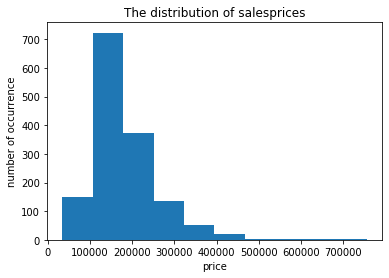

In [12]:
plt.hist(hp2.saleprice)
plt.title("The distribution of salesprices")
plt.xlabel("price")
plt.ylabel("number of occurrence")
plt.show()

In [0]:
hp2['poolarea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: poolarea, dtype: int64

In [0]:
hp2['screenporch'].value_counts()

0      1344
192       6
224       5
120       5
189       4
       ... 
182       1
440       1
178       1
312       1
480       1
Name: screenporch, Length: 76, dtype: int64

In [0]:
hp2['threessnporch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: threessnporch, dtype: int64

In [0]:
hp2['openporchsf'].value_counts()

0      656
36      29
48      22
20      21
40      19
      ... 
159      1
156      1
148      1
142      1
119      1
Name: openporchsf, Length: 202, dtype: int64

In [0]:
hp2['enclosedporch'].value_counts()

0      1252
112      15
96        6
120       5
144       5
       ... 
174       1
177       1
183       1
189       1
552       1
Name: enclosedporch, Length: 120, dtype: int64

In [0]:
hp2['bsmtfinsf2'].value_counts()

0       1293
180        5
374        3
551        2
93         2
        ... 
532        1
544        1
546        1
547        1
1474       1
Name: bsmtfinsf2, Length: 144, dtype: int64

In [13]:
hp2['lowqualfinsf'].value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: lowqualfinsf, dtype: int64

In [0]:
hp2['secondflrsf'].value_counts()

0       829
728      10
504       9
672       8
546       8
       ... 
788       1
1116      1
1112      1
1111      1
1872      1
Name: secondflrsf, Length: 417, dtype: int64

In [0]:
hp2['wooddecksf'].value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: wooddecksf, Length: 274, dtype: int64

ALL THESE COLUMNS ARE MOSTLY ZEROES SO  WILL DROP


In [0]:
hp2=hp2.drop(columns=['secondflrsf','lowqualfinsf','bsmtfinsf2','enclosedporch','openporchsf','threessnporch','screenporch','poolarea','wooddecksf'])

In [15]:
hp2.head()

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,0,12,2008,WD,Normal,250000


In [0]:
#hp2.info()

WILL CHECK THE 7 CONTINUOUS COLUMNS FOR OUTLIERS

In [0]:
hp2_continue=hp2[['lotarea','masvnrarea','bsmtfinsf1','firstflrsf','grlivarea','garagearea','totalbsmtsf']]

In [94]:
hp2_continue.head()

,lotarea,masvnrarea,bsmtfinsf1,firstflrsf,grlivarea,garagearea
0,8450,196.0,706,856,1710,548
1,9600,0.0,978,1262,1262,460
2,11250,162.0,486,920,1786,608
3,9550,0.0,216,961,1717,642
4,14260,350.0,655,1145,2198,836


In [95]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(hp2_continue))
z1=(z>1)
z2=(z>2)
print(z)

[[0.20714171 0.51410389 0.57542484 0.79343379 0.37033344 0.35100032]
 [0.09188637 0.57075013 1.17199212 0.25714043 0.48251191 0.06073101]
 [0.07347998 0.32591493 0.09290718 0.62782603 0.51501256 0.63172623]
 ...
 [0.14781027 0.57075013 0.36987111 0.06565646 1.56964722 1.03391416]
 [0.08016039 0.57075013 0.86554834 0.21898188 0.83278768 1.09005935]
 [0.05811155 0.57075013 0.84738933 0.2416147  0.49393395 0.9216238 ]]


In [96]:
z1

array([[False, False, False, False, False, False],
       [False, False,  True, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True],
       [False, False, False, False, False, False]])

**SOME VALUES GREATER THAN ONE STD AWAY**



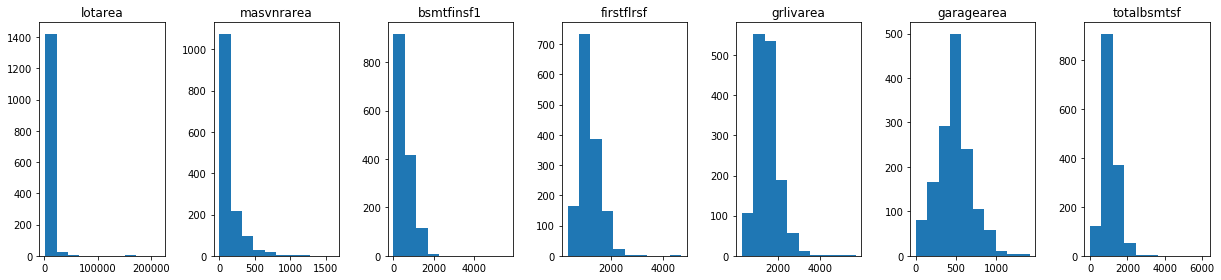

In [21]:
plt.figure(figsize=(17,4))

plt.subplot(1,7,1)
plt.hist(hp2['lotarea'])
plt.title('lotarea')

plt.subplot(1,7,2)
plt.hist(hp2['masvnrarea'])
plt.title('masvnrarea')

plt.subplot(1,7,3)
plt.hist(hp2['bsmtfinsf1'])
plt.title('bsmtfinsf1')

plt.subplot(1,7,4)
plt.hist(hp2['firstflrsf'])
plt.title('firstflrsf')

plt.subplot(1,7,5)
plt.hist(hp2['grlivarea'])
plt.title('grlivarea')

plt.subplot(1,7,6)
plt.hist(hp2['garagearea'])
plt.title('garagearea')

plt.subplot(1,7,7)
plt.hist(hp2['totalbsmtsf'])
plt.title('totalbsmtsf')


plt.tight_layout()


In [83]:
hp2_continue.shape

(1460, 6)

In [0]:
hp2_limited=hp2_continue[:500]

In [86]:
hp2_limited.shape

(500, 6)

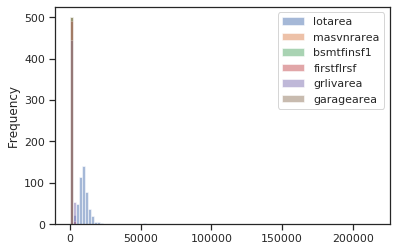

In [102]:
hp2_limited.plot.hist(bins=100, alpha=0.5)

///////////////////////////////////////////////////////////////////////

  **BREAK**

In [0]:
hp2_continue.head()

,lotarea,masvnrarea,bsmtfinsf1,firstflrsf,grlivarea,garagearea,totalbsmtsf
0,8450,196.0,706,856,1710,548,856
1,9600,0.0,978,1262,1262,460,1262
2,11250,162.0,486,920,1786,608,920
3,9550,0.0,216,961,1717,642,756
4,14260,350.0,655,1145,2198,836,1145


#plt.subplots_adjust(right=2,top=2,bottom=.2,wspace=.2)

plt.boxplot(hp2['lotarea'])
plt.title('lotarea')
plt.show()

plt.boxplot(hp2['masvnrarea'])
plt.title('masvnrarea')
plt.show()


plt.boxplot(hp2['bsmtfinsf1'])
plt.title('bsmtfinsf1')
plt.show()


plt.boxplot(hp2['firstflrsf'])
plt.title('firstflrsf')
plt.show()


plt.boxplot(hp2['grlivarea'])
plt.title('grlivarea')
plt.show()


plt.boxplot(hp2['garagearea'])
plt.title('garagearea')
plt.show()

plt.boxplot(hp2['totalbsmtsf'])
plt.title('totalbsmtsf')
plt.show()

plt.boxplot(hp2_continue)

**Winsorize**

In [0]:
from scipy.stats.mstats import winsorize

In [0]:
hp2['lotarea'] = winsorize(hp2["lotarea"], (.05,.10))
hp2['masvnrarea'] = winsorize(hp2["masvnrarea"], (.05,.10))
hp2['bsmtfinsf1'] = winsorize(hp2["bsmtfinsf1"], (.05,.10))
hp2['firstflrsf'] = winsorize(hp2["firstflrsf"], (.05,.10))
hp2['grlivarea'] = winsorize(hp2["grlivarea"], (.05,.10))
hp2['garagearea'] = winsorize(hp2["garagearea"], (.05,.10))
hp2['totalbsmtsf'] = winsorize(hp2["totalbsmtsf"], (.05,.10))


**BOX PLOTS AFTER WINSORIATION**


#plt.subplots_adjust(right=2,top=2,bottom=.2,wspace=.2)

plt.boxplot(hp2['lotarea'])
plt.title('lotarea')
plt.show()

plt.boxplot(hp2['masvnrarea'])
plt.title('masvnrarea')
plt.show()


plt.boxplot(hp2['bsmtfinsf1'])
plt.title('bsmtfinsf1')
plt.show()


plt.boxplot(hp2['firstflrsf'])
plt.title('firstflrsf')
plt.show()


plt.boxplot(hp2['grlivarea'])
plt.title('grlivarea')
plt.show()


plt.boxplot(hp2['garagearea'])
plt.title('garagearea')
plt.show()

plt.boxplot(hp2['totalbsmtsf'])
plt.title('totalbsmtsf')
plt.show()

In [30]:
hp2_continue.head(3)

,lotarea,masvnrarea,bsmtfinsf1,firstflrsf,grlivarea,garagearea,totalbsmtsf
0,8450,196.0,706,856,1710,548,856
1,9600,0.0,978,1262,1262,460,1262
2,11250,162.0,486,920,1786,608,920


**ADD BACK IN SALEPRICE FOR CORRELATION -- CONTINUOUS VARIABLES ONLY**

In [0]:
hp2_continue['saleprice']=hp2['saleprice']

In [0]:
hp2_continue.fillna(0,inplace=True)

In [33]:
hp2_continue.corr()

,lotarea,masvnrarea,bsmtfinsf1,firstflrsf,grlivarea,garagearea,totalbsmtsf,saleprice
lotarea,1.000000,0.103321,0.214103,0.299475,0.263116,0.180403,0.260833,0.263843
masvnrarea,0.103321,1.000000,0.261256,0.339850,0.388052,0.370884,0.360067,0.472614
bsmtfinsf1,0.214103,0.261256,1.000000,0.445863,0.208171,0.296970,0.522396,0.386420
firstflrsf,0.299475,0.339850,0.445863,1.000000,0.566024,0.489782,0.819530,0.605852
grlivarea,0.263116,0.388052,0.208171,0.566024,1.000000,0.468997,0.454868,0.708624
garagearea,0.180403,0.370884,0.296970,0.489782,0.468997,1.000000,0.486665,0.623431
totalbsmtsf,0.260833,0.360067,0.522396,0.819530,0.454868,0.486665,1.000000,0.613581
saleprice,0.263843,0.472614,0.386420,0.605852,0.708624,0.623431,0.613581,1.000000


**NEXT FIND FEATURES HIGHLY CORRELATED WITH EACH OTHER**

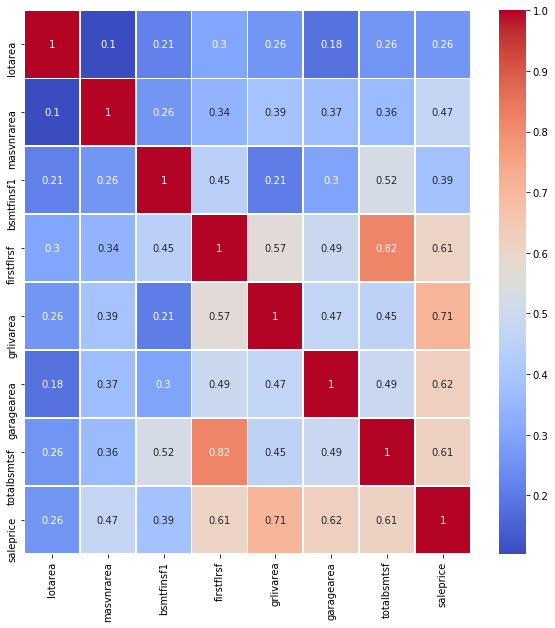

In [34]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(hp2_continue.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

WILL CHECK LINERAITY OF COEFFICIENTS HERE


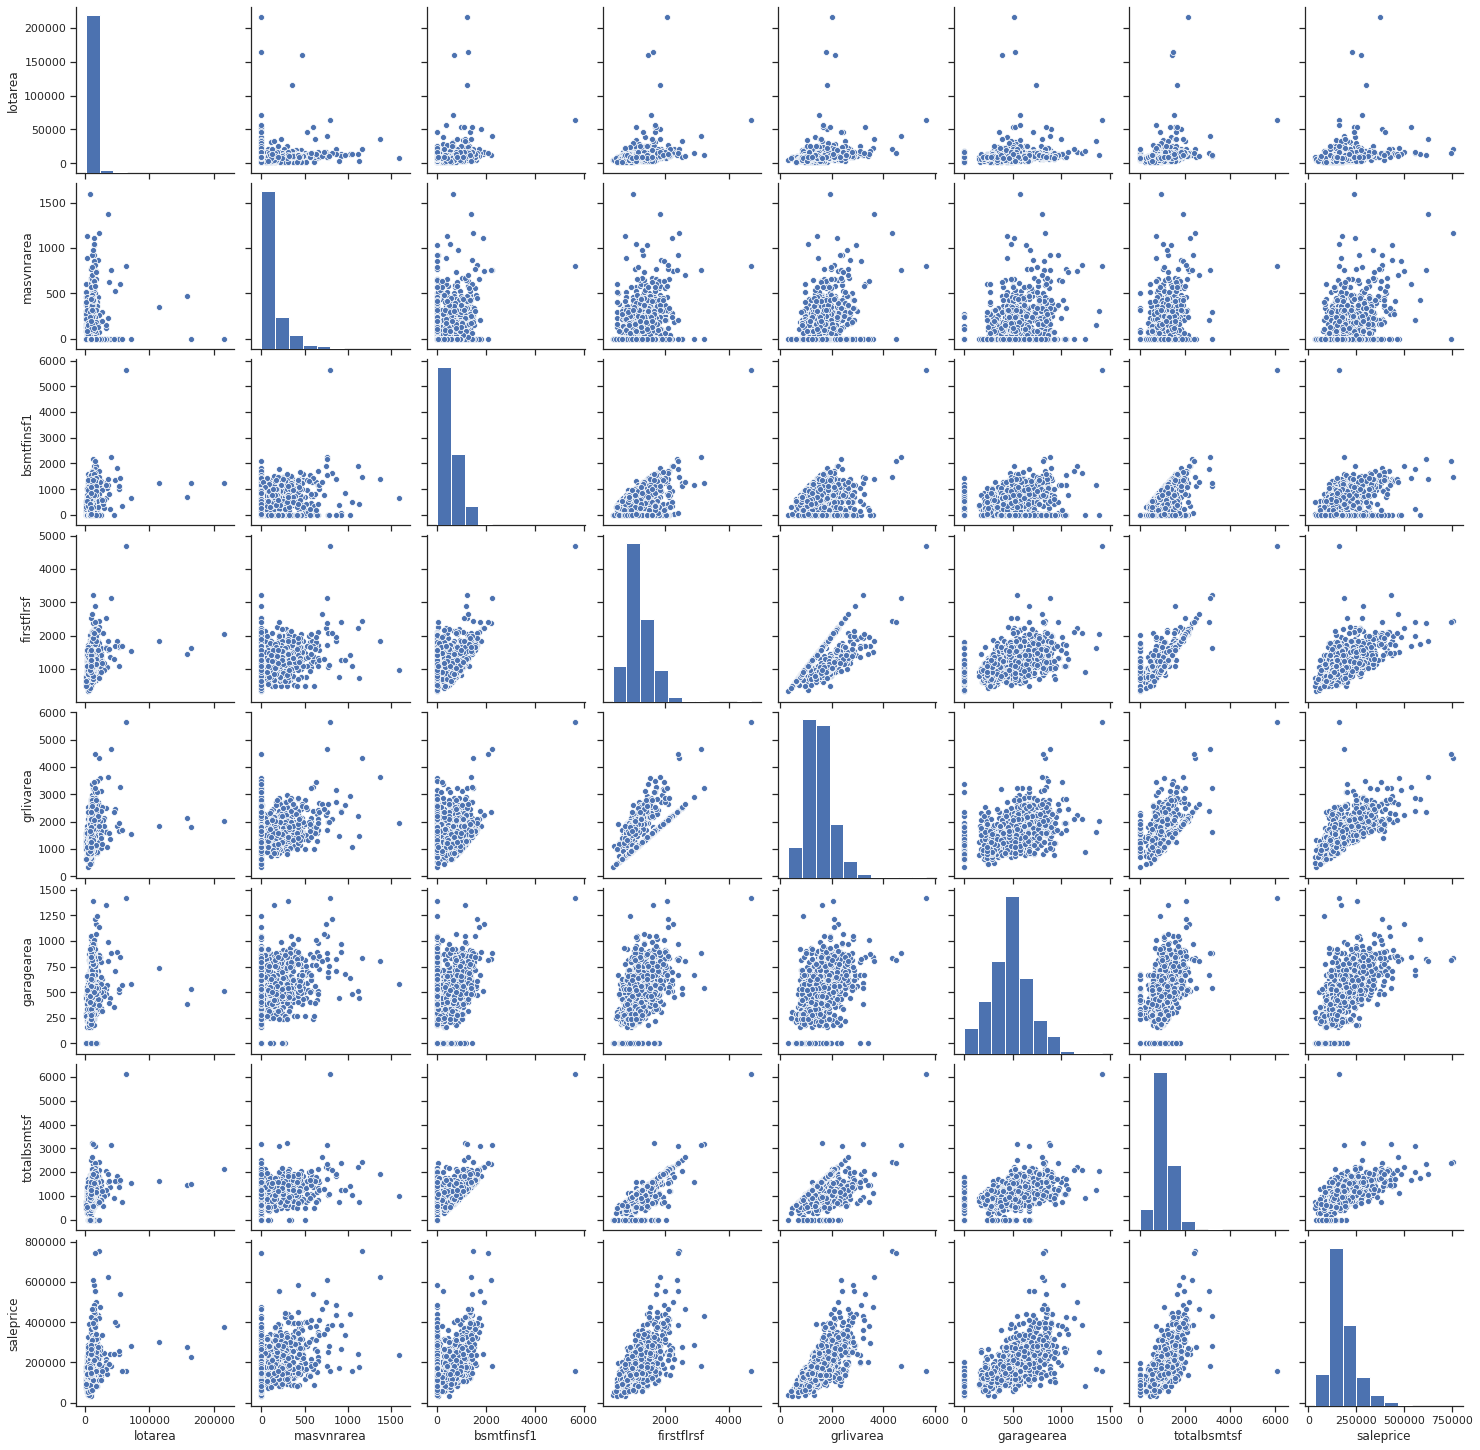

In [35]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
##iris = sns.load_dataset("iris")
g = sns.pairplot(hp2_continue,kind='scatter')

**LOT AREA IS QUESTIONABLE**

#**Assumption two: the error term should be zero on average**

In [0]:
lrm = linear_model.LinearRegression()

In [78]:
# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions = lrm.predict(X)

In [79]:
errors = Y - predictions

print("Mean of the errors in housing predictions = lrm.predict(X) costs model is: {}".format(np.mean(errors)))

Mean of the errors in housing predictions = lrm.predict(X) costs model is: -1.2827612944457629e-11


**the average of the model's error is effectively zero**.

In [0]:
target=hp2['saleprice']

#**Assumption three: homoscedasticity**

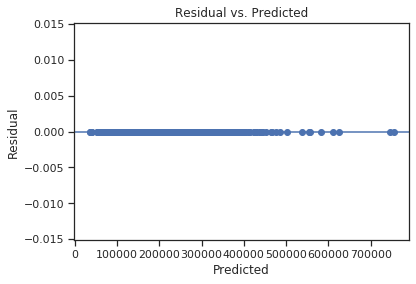

In [80]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

variance is not uniform

CHECK FURTHER



In [0]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

**SMALL P-VLAUES ==> NOT HOMOSCEDASTIC**

#**Assumption four: low multicollinearity**

LOOK AT CORRELATION MATRIX

**firstflrsf AND totalbsmtsf ARE HIGHLY CORRELATED -- WILL DROP ONE AND CHECK AGAIN**

In [0]:
X.drop('totalbsmtsf',axis=1,inplace=True)

In [82]:
X.head()

,const,id,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtunfsf,firstflrsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,miscval,mosold,yrsold,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,...,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1.0,1,60,8450,7,5,2003,2003,196.0,706,150,856,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1.0,2,20,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,1,2,0,3,1,6,1,1976.0,2,460,0,5,2007,181500,0,0,1,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1.0,3,60,11250,7,5,2001,2002,162.0,486,434,920,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1.0,4,70,9550,7,5,1915,1970,0.0,216,540,961,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,2,2006,140000,0,0,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.0,5,60,14260,8,5,2000,2000,338.0,655,490,1145,2158,1,0,2,1,4,1,9,1,2000.0,3,757,0,12,2008,250000,0,0,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


#**NOW RUN EVERYTHING AGAIN**

In [0]:
list(hp2_continue)

['lotarea',
 'masvnrarea',
 'bsmtfinsf1',
 'firstflrsf',
 'grlivarea',
 'garagearea',
 'totalbsmtsf',
 'saleprice']

In [0]:
hp2_continue.drop(['totalbsmtsf'],axis=1,inplace=True)

In [71]:
hp2_continue.corr()

,lotarea,masvnrarea,bsmtfinsf1,firstflrsf,grlivarea,garagearea
lotarea,1.000000,0.103321,0.214103,0.299475,0.263116,0.180403
masvnrarea,0.103321,1.000000,0.261256,0.339850,0.388052,0.370884
bsmtfinsf1,0.214103,0.261256,1.000000,0.445863,0.208171,0.296970
firstflrsf,0.299475,0.339850,0.445863,1.000000,0.566024,0.489782
grlivarea,0.263116,0.388052,0.208171,0.566024,1.000000,0.468997
garagearea,0.180403,0.370884,0.296970,0.489782,0.468997,1.000000


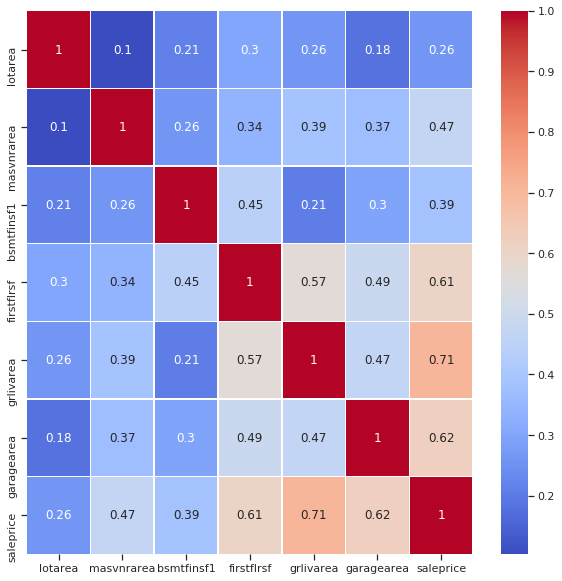

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(hp2_continue.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

In [0]:
#g = sns.pairplot(hp2_continue,kind='scatter')

In [73]:
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
errors = Y - predictions
print("Mean of the errors in housing predictions = lrm.predict(X) costs model is: {}".format(np.mean(errors)))

NameError: ignored

MEAN ERROR TERM STILL BASICALLY ZERO

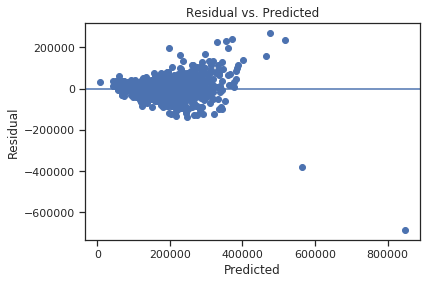

In [0]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [0]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 201.111 and p value is 1.19e-45
Levene test statistic value is 185.928 and p value is 4.35e-41


STILL HETERO

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [0]:
hp2_continue=hp2_continue.drop(['saleprice'],axis=1)

In [0]:
l=list(hp2_continue)

In [0]:
hp2[l]=hp2_continue

In [0]:
hp2.head()

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,0,12,2008,WD,Normal,250000


In [0]:
from sklearn.preprocessing import OneHotEncoder 

df = pd.get_dummies(hp4, columns=['overallqual','garagecars'],drop_first=True)

In [0]:
df=pd.get_dummies(hp2,drop_first=True)

In [0]:
df.fillna(0,inplace=True)

In [0]:
X=df

In [68]:
X.head()

,id,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtunfsf,totalbsmtsf,firstflrsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,miscval,mosold,yrsold,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,...,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,150,856,856,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,284,1262,1262,1262,0,1,2,0,3,1,6,1,1976.0,2,460,0,5,2007,181500,0,0,1,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,434,920,920,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,540,756,961,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,2,2006,140000,0,0,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,338.0,655,490,1145,1145,2158,1,0,2,1,4,1,9,1,2000.0,3,757,0,12,2008,250000,0,0,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [60]:
X.isna().sum()

id                       0
mssubclass               0
lotarea                  0
overallqual              0
overallcond              0
                        ..
salecondition_AdjLand    0
salecondition_Alloca     0
salecondition_Family     0
salecondition_Normal     0
salecondition_Partial    0
Length: 224, dtype: int64

In [0]:
X=hp2_continue

X.isnull().sum()

In [0]:
#df[1].fillna(0, inplace=True)#
X.fillna(0,inplace=True)

X.isnull().sum()

In [0]:
Y=target

In [69]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.882e+26
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:42:50   Log-Likelihood:                 25202.
No. Observations:                1460   AIC:                        -4.996e+04
Df Residuals:                    1236   BIC:                        -4.877e+04
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.054e-09   3.83e-07      0.016      0.987   -7.46e-07    7.58e-07
id                     1.243e-14   5.68e-13      0.022      0.983    -1.1e-12    1.13e-12
mssubclass                     0   3.05e-11          0      1.000   -5.98e-11    5.98e-11
lotarea               -4.885e-15   1.36e-13     -0.036      0.971   -2.72e-13    2.63e-13
overallqual           -6.366e-11   3.79e-10     -0.168      0.867   -8.07e-10     6.8e-10
overallcond            2.728e-12    3.2e-10      0.009      0.993   -6.26e-10    6.31e-10
yearbuilt               1.08e-12    2.7e-11      0.040      0.968   -5.19e-11    5.41e-11
yearremodadd          -1.364e-12      2e-11     -0.068      0.946   -4.07e-11    3.79e-11
masvnrarea             3.197e-14   3.97e-12      0.008      0.994   -7.76e-12    7.83e-12
bsmtfinsf1             -1.35e-13   2.16e-12     -0.062      0.950   -4.38e-12    4.11e-12
bsmtunfsf              3.908e-14   1.81e-12      0.022      0.983   -3.52e-12     3.6e-12
totalbsmtsf            8.527e-14   2.66e-12      0.032      0.974   -5.13e-12     5.3e-12
firstflrsf             -6.75e-14   2.65e-12     -0.026      0.980   -5.26e-12    5.12e-12
grlivarea              1.847e-13      2e-12      0.092      0.926   -3.74e-12    4.11e-12
bsmtfullbath          -1.091e-11   7.19e-10     -0.015      0.988   -1.42e-09     1.4e-09
bsmthalfbath           7.276e-12    1.1e-09      0.007      0.995   -2.16e-09    2.17e-09
fullbath              -2.547e-11   7.92e-10     -0.032      0.974   -1.58e-09    1.53e-09
halfbath              -2.728e-12   7.67e-10     -0.004      0.997   -1.51e-09     1.5e-09
bedroomabvgr           1.455e-11   4.95e-10      0.029      0.977   -9.56e-10    9.86e-10
kitchenabvgr          -3.638e-12   2.09e-09     -0.002      0.999   -4.11e-09     4.1e-09
totrmsabvgrd           7.276e-12   3.36e-10      0.022      0.983   -6.52e-10    6.67e-10
fireplaces             6.366e-12   4.88e-10      0.013      0.990   -9.52e-10    9.64e-10
garageyrblt           -1.457e-13   3.82e-12     -0.038      0.970   -7.63e-12    7.34e-12
garagecars            -7.276e-12   8.43e-10     -0.009      0.993   -1.66e-09    1.65e-09
garagearea             1.528e-13   3.37e-12      0.045      0.964   -6.45e-12    6.76e-12
miscval                3.553e-15   5.21e-13      0.007      0.995   -1.02e-12    1.03e-12
mosold                -1.137e-12   8.96e-11     -0.013      0.990   -1.77e-10    1.75e-10
yrsold                -6.139e-12   1.89e-10     -0.033      0.974   -3.76e-10    3.64e-10
saleprice                 1.0000   9.13e-15   1.09e+14      0.000       1.000       1.000
mszoning_FV            4.002e-11    4.4e-09      0.009      0.993    -8.6e-09    8.68e-09
mszoning_RH            1.091e-11   4.37e-09      0.002      0.998   -8.57e-09    8.59e-09
mszoning_RL            

#**ASSIGNMENT QUESTION 3**

Load the houseprices data from Thinkful's database.

Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?

Now, exclude the insignificant features from your model. Did anything change?

Interpret the statistically significant coefficients by quantifying their relations with the house prices.

 Which features have a more prominent effect on house prices?
 
Do the results sound reasonable to you? If not, try to explain the potential reasons.




iNSIGNIFICANT = OVERALLQUAL_2,_3,_4

In [0]:
list(X)

['const',
 'firstflrsf',
 'grlivarea',
 'overallqual_2',
 'overallqual_3',
 'overallqual_4',
 'overallqual_5',
 'overallqual_6',
 'overallqual_7',
 'overallqual_8',
 'overallqual_9',
 'overallqual_10',
 'garagecars_1',
 'garagecars_2',
 'garagecars_3',
 'garagecars_4']

In [0]:
fill_list=[
 'firstflrsf',
 'grlivarea',
 'overallqual_5',
 'overallqual_6',
 'overallqual_7',
 'overallqual_8',
 'overallqual_9',
 'overallqual_10',
 'garagecars_1',
 'garagecars_2',
 'garagecars_3',
 'garagecars_4']

In [0]:
X=df[fill_list]

In [0]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     434.5
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        02:36:34   Log-Likelihood:                -17430.
No. Observations:                1460   AIC:                         3.489e+04
Df Residuals:                    1447   BIC:                         3.495e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -978.1197   6340.337     -0.154      0.877   -1.34e+04    1.15e+04
firstflrsf        37.0705      4.061      9.128      0.000      29.104      45.037
grlivarea         48.2168      3.466     13.911      0.000      41.418      55.016
overallqual_5   1.678e+04   3760.974      4.462      0.000    9405.599    2.42e+04
overallqual_6   3.075e+04   3981.480      7.722      0.000    2.29e+04    3.86e+04
overallqual_7   5.629e+04   4366.424     12.891      0.000    4.77e+04    6.49e+04
overallqual_8   9.646e+04   5205.710     18.530      0.000    8.62e+04    1.07e+05
overallqual_9   1.666e+05   7632.087     21.826      0.000    1.52e+05    1.82e+05
overallqual_10  2.296e+05   1.03e+04     22.333      0.000    2.09e+05     2.5e+05
garagecars_1    1.392e+04   4665.298      2.984      0.003    4771.344    2.31e+04
garagecars_2    2.655e+04   4690.072      5.662      0.000    1.74e+04    3.58e+04
garagecars_3    6.216e+04   6013.822     10.337      0.000    5.04e+04     7.4e+04
garagecars_4    4.464e+04   1.72e+04      2.591      0.010    1.08e+04    7.84e+04
==============================================================================
Omnibus:                      472.733   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10204.935
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                      15.804   Cond. No.                     3.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OVERALL QUALITY 9 AND 10 HAVE MOST PROMINENT AFFECT ON PRICE

NOT SURPRISING AT 9 AND 10 ARE THE HIGHEST RATINGS FOR OVERALL QUALLITY

**For each model you try, get the goodness of fit metrics and compare your models with each other**.

 **Which model is the best and why**?

COMPARING THESE TWO MODELS -- MODEL 1 IS BETTER -- HIGHER R^2, LOWER AIC, BIC

